Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - accuracy: 0.6739 - loss: 1.0892 - val_accuracy: 0.7507 - val_loss: 1.4553
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.9114 - loss: 0.3000 - val_accuracy: 0.9854 - val_loss: 0.0445
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9350 - loss: 0.2196 - val_accuracy: 0.9826 - val_loss: 0.0573
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9479 - loss: 0.1795 - val_accuracy: 0.9894 - val_loss: 0.0363
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.9553 - loss: 0.1505 - val_accuracy: 0.9875 - val_loss: 0.0368
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9575 - loss: 0.1490 - val_accuracy: 0.9904 - val_loss: 0.0334
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9635 - loss: 0.1281 - val_accuracy: 0.9885 - val_loss: 0.0371
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9637 - loss: 0.1243 - val_accurac

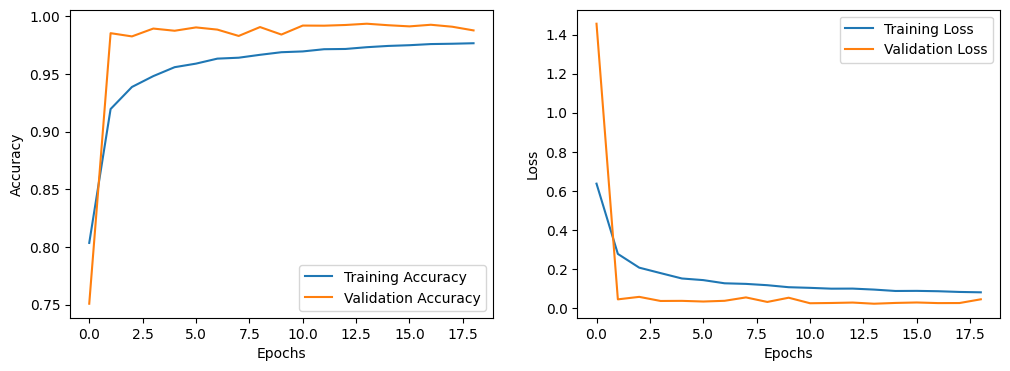

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0278
Test accuracy: 0.9936000108718872
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


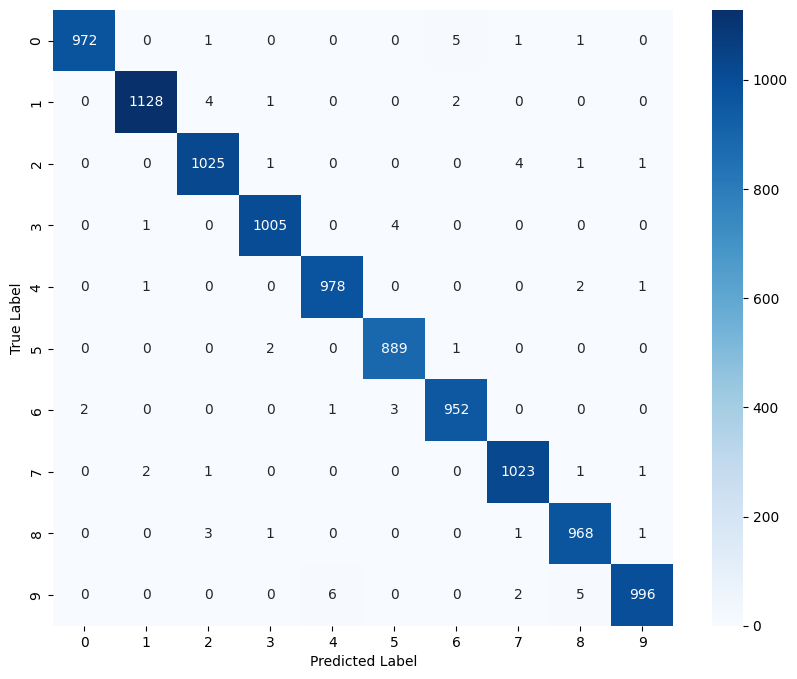

In [23]:
# Import necessary libraries
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Function to load and preprocess the MNIST data
def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    # Reshape data to include the channel dimension
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
    # Convert class vectors to binary class matrices (one-hot encoding)
    y_train = keras.utils.to_categorical(y_train, 10)
    y_test = keras.utils.to_categorical(y_test, 10)
    return X_train, y_train, X_test, y_test

# Function to build the CNN model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to plot the training history
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot the confusion matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)
    cm = confusion_matrix(y_true, y_pred_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Load data
X_train, y_train, X_test, y_test = load_data()

# Set up data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)

# Build and compile the model
model = build_model((28, 28, 1))

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(patience=5, restore_best_weights=True, monitor='val_loss', mode='min')

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    validation_data=(X_test, y_test),
                    epochs=50,
                    callbacks=[checkpoint, early_stopping])

# Plot training history
plot_history(history)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Plot the confusion matrix
plot_confusion_matrix(model, X_test, y_test)
